### Telco Customer Churn Classification Project - rough draft

In [1]:
# bring in my imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from env import host, user, password


import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare

# Plan -> Acquire -> Prepare -> Explore -> Model & Evaluate -> Deliver

## Acquire my data

In [ ]:
# def get_db_url(host, user, password, database):
#     url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
#     return url

In [ ]:
# url = get_db_url(host, user, password, 'telco_churn')

In [ ]:
# pd.read_sql('SELECT * FROM customers LIMIT 5 OFFSET 50', url)

In [ ]:
# create my sql query
# pd.read_sql(
# '''
# SELECT *
# FROM payment_types
# JOIN customers ON payment_types.payment_type_id = customers.payment_type_id
# JOIN internet_service_types ON internet_service_types.internet_service_type_id = customers.internet_service_type_id
# JOIN contract_types ON contract_types.contract_type_id = customers.contract_type_id;
# ''', url
# )

In [2]:
# now we've done everything manually, let's combine and create functions
# create helper function
def get_connection(db_name):
    '''
    This function uses my info from my env file to
    create a connection url to access the sql database.
    '''
    from env import host, user, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

In [3]:
# create my function for my sql query
def get_new_telco_churn_data():
    '''
    This function reads in the telco churn data from the sql database
    and returns a pandas DataFrame with all columns.
    '''
    sql_query = '''
    SELECT *
    FROM payment_types
    JOIN customers ON payment_types.payment_type_id = customers.payment_type_id
    JOIN internet_service_types ON internet_service_types.internet_service_type_id = customers.internet_service_type_id
    JOIN contract_types ON contract_types.contract_type_id = customers.contract_type_id;
    '''
    return pd.read_sql(sql_query, get_connection('telco_churn'))

In [ ]:
df = get_new_telco_churn_data()

In [ ]:
df.sample(5)

In [ ]:
df.shape

### New Functions

In [4]:
# make sure our function works
df = acquire.get_new_telco_churn_data()

In [5]:
df.sample(5).T

,6221,675,6111,5099,2194
payment_type_id,3,4,1,2,3
payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Bank transfer (automatic)
customer_id,5696-CEIQJ,0666-UXTJO,3070-BDOQC,5815-HGGHV,7718-RXDGG
gender,Male,Male,Female,Male,Male
senior_citizen,0,1,0,0,0
partner,Yes,Yes,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,67,34,60,20,15
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,No,No,No,No


In [6]:
df.info

<bound method DataFrame.info of      payment_type_id               payment_type customer_id  gender  \
0                  2               Mailed check  0030-FNXPP  Female   
1                  2               Mailed check  0031-PVLZI  Female   
2                  1           Electronic check  0098-BOWSO    Male   
3                  1           Electronic check  0107-WESLM    Male   
4                  3  Bank transfer (automatic)  0114-RSRRW  Female   
...              ...                        ...         ...     ...   
7038               4    Credit card (automatic)  9919-FZDED    Male   
7039               3  Bank transfer (automatic)  9926-PJHDQ  Female   
7040               2               Mailed check  9928-BZVLZ  Female   
7041               2               Mailed check  9993-LHIEB    Male   
7042               1           Electronic check  9995-HOTOH    Male   

      senior_citizen partner dependents  tenure phone_service  \
0                  0      No         No       3   

## Prepare my data

In [7]:
list(df.columns)

['payment_type_id',
 'payment_type',
 'customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'internet_service_type_id',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'contract_type_id',
 'paperless_billing',
 'payment_type_id',
 'monthly_charges',
 'total_charges',
 'churn',
 'internet_service_type_id',
 'internet_service_type',
 'contract_type_id',
 'contract_type']

In [8]:
# how to rid of duplicate column
df = df.loc[:, ~df.columns.duplicated()]

In [9]:
df.shape

(7043, 24)

In [10]:
# check for nulls
df.isnull().any()

payment_type_id             False
payment_type                False
customer_id                 False
gender                      False
senior_citizen              False
partner                     False
dependents                  False
tenure                      False
phone_service               False
multiple_lines              False
internet_service_type_id    False
online_security             False
online_backup               False
device_protection           False
tech_support                False
streaming_tv                False
streaming_movies            False
contract_type_id            False
paperless_billing           False
monthly_charges             False
total_charges               False
churn                       False
internet_service_type       False
contract_type               False
dtype: bool

In [11]:
df.dtypes

payment_type_id               int64
payment_type                 object
customer_id                  object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
internet_service_type_id      int64
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
contract_type_id              int64
paperless_billing            object
monthly_charges             float64
total_charges                object
churn                        object
internet_service_type        object
contract_type                object
dtype: object

In [12]:
# this is for the blank total charges
df = df.replace(' ', np.nan)

In [13]:
# check again for nulls
df.isnull().any()

payment_type_id             False
payment_type                False
customer_id                 False
gender                      False
senior_citizen              False
partner                     False
dependents                  False
tenure                      False
phone_service               False
multiple_lines              False
internet_service_type_id    False
online_security             False
online_backup               False
device_protection           False
tech_support                False
streaming_tv                False
streaming_movies            False
contract_type_id            False
paperless_billing           False
monthly_charges             False
total_charges                True
churn                       False
internet_service_type       False
contract_type               False
dtype: bool

In [14]:
# drop nulls
df.dropna(inplace=True)

In [15]:
# check again for nulls
df.isnull().any()

payment_type_id             False
payment_type                False
customer_id                 False
gender                      False
senior_citizen              False
partner                     False
dependents                  False
tenure                      False
phone_service               False
multiple_lines              False
internet_service_type_id    False
online_security             False
online_backup               False
device_protection           False
tech_support                False
streaming_tv                False
streaming_movies            False
contract_type_id            False
paperless_billing           False
monthly_charges             False
total_charges               False
churn                       False
internet_service_type       False
contract_type               False
dtype: bool

In [16]:
df.shape

(7032, 24)

In [17]:
# change total charges to float
df.total_charges = df.total_charges.astype('float')

In [18]:
df.dtypes

payment_type_id               int64
payment_type                 object
customer_id                  object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
internet_service_type_id      int64
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
contract_type_id              int64
paperless_billing            object
monthly_charges             float64
total_charges               float64
churn                        object
internet_service_type        object
contract_type                object
dtype: object

In [ ]:
# general value counts on my entire data frame

columns = ['payment_type_id', 'payment_type', 'gender', 'senior_citizen', 'partner', 'dependents', 
           'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id', 
           'online_security', 'online_backup', 'device_protection', 'tech_support',
          'streaming_tv', 'streaming_movies', 'contract_type_id', 'paperless_billing',
          'monthly_charges', 'total_charges', 'churn', 'internet_service_type', 'contract_type']

for col in columns:
    print(col)
    print(df[col].value_counts())
    print('-------------')

In [20]:
# make a df just for churned customers so we can hone in on a drive
churned_df = df[df['churn']=='Yes']
churned_df.sample(5).T

,2403,1754,6112,3469,2836
payment_type_id,1,1,4,2,1
payment_type,Electronic check,Electronic check,Credit card (automatic),Mailed check,Electronic check
customer_id,8816-VXNZD,5609-CEBID,3090-HAWSU,6629-CZTTH,1612-EOHDH
gender,Female,Female,Male,Male,Female
senior_citizen,0,1,0,0,0
partner,No,No,No,No,No
dependents,No,No,No,No,No
tenure,1,20,61,1,1
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,Yes,Yes,Yes,No,No


In [21]:
# value counts on my churned data frame

columns = ['payment_type_id', 'payment_type', 'gender', 'senior_citizen', 'partner', 'dependents', 
           'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id', 
           'online_security', 'online_backup', 'device_protection', 'tech_support',
          'streaming_tv', 'streaming_movies', 'contract_type_id', 'paperless_billing',
          'monthly_charges', 'total_charges', 'churn', 'internet_service_type', 'contract_type']

for col in columns:
    print(col)
    print(churned_df[col].value_counts())
    print('-------------')

payment_type_id
1    1071
2     308
3     258
4     232
Name: payment_type_id, dtype: int64
-------------
payment_type
Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: payment_type, dtype: int64
-------------
gender
Female    939
Male      930
Name: gender, dtype: int64
-------------
senior_citizen
0    1393
1     476
Name: senior_citizen, dtype: int64
-------------
partner
No     1200
Yes     669
Name: partner, dtype: int64
-------------
dependents
No     1543
Yes     326
Name: dependents, dtype: int64
-------------
tenure
1     380
2     123
3      94
4      83
5      64
     ... 
45      6
72      6
62      5
63      4
64      4
Name: tenure, Length: 72, dtype: int64
-------------
phone_service
Yes    1699
No      170
Name: phone_service, dtype: int64
-------------
multiple_lines
Yes                 850
No                  849
No phone service    170
Name: multiple_lines, dtype: int64
------

### What are my takeaways?
- Right off the bat I can see which columns have an obvious association to churn:
 - contract_type/contract_type_id
 - internet_service_type/internet_service_type_id
 - paperless billing
 - tech_support
 - device_protection
 - online_backup
 - online security
 - phone_service
 - dependents
 - partner
 - senior_citizen
 - payment_type/paymnent_type_id
 
----------------
 
- Things to investigate further:
 - Is there an association with total charges?
 - Is there an association with monthly charges?
 - Is there an association with tenure?
 
----------------
 
- We don't care too much about:
 - streaming_movies
 - streaming_tv
 - multiple_lines
 - gender

In [22]:
# turn all my string columns into integers
columns = ['partner', 'dependents', 'phone_service', 'multiple_lines', 
           'online_security', 'online_backup', 'device_protection', 'tech_support',
          'streaming_tv', 'streaming_movies', 'paperless_billing']

for cols in columns:
    df[cols] = np.where(df[cols] == 'Yes', 1, 0)

In [25]:
# make new df to explore with, drop all string columns except churn
explore_df = df.drop(columns=['payment_type', 'customer_id', 'internet_service_type', 'contract_type', 'gender'])

In [29]:
explore_df.dtypes

payment_type_id               int64
senior_citizen                int64
partner                       int64
dependents                    int64
tenure                        int64
phone_service                 int64
multiple_lines                int64
internet_service_type_id      int64
online_security               int64
online_backup                 int64
device_protection             int64
tech_support                  int64
streaming_tv                  int64
streaming_movies              int64
contract_type_id              int64
paperless_billing             int64
monthly_charges             float64
total_charges               float64
churn                        object
dtype: object

In [ ]:
# let's drop the columns we know don't matter so we can have a cleaner dataframe
df = df.drop(columns=['streaming_movies', 'streaming_tv', 'multiple_lines', 'gender'])
churned_df = df[df['churn']=='Yes']

In [28]:
# split my data

payment_type_id               int64
payment_type                 object
customer_id                  object
gender                       object
senior_citizen                int64
partner                       int64
dependents                    int64
tenure                        int64
phone_service                 int64
multiple_lines                int64
internet_service_type_id      int64
online_security               int64
online_backup                 int64
device_protection             int64
tech_support                  int64
streaming_tv                  int64
streaming_movies              int64
contract_type_id              int64
paperless_billing             int64
monthly_charges             float64
total_charges               float64
churn                        object
internet_service_type        object
contract_type                object
dtype: object

# Explore

In [ ]:
#  Is there an association with monthly charges?
df.monthly_charges.mean(), churned_df.monthly_charges.mean()

In [ ]:
# churned customers pay more monthly charges than overall customers
df.monthly_charges.hist()
churned_df.monthly_charges.hist()
plt.xlabel('monthly charges')
plt.ylabel('amount of customers')

In [ ]:
df.total_charges.mean(), churned_df.total_charges.mean()

In [ ]:
# comparison of total charges
df.total_charges.hist()
churned_df.total_charges.hist()
plt.xlabel('total charges')
plt.ylabel('amount of customers')

In [ ]:
# comparison of tenure
df.tenure.hist()
churned_df.tenure.hist()
plt.xlabel('tenure')
plt.ylabel('amount of customers')

In [ ]:
list(df.columns)

In [ ]:
df.sample(1).T

In [ ]:
df.dtypes

In [31]:
churned_df.dtypes

payment_type_id               int64
payment_type                 object
customer_id                  object
gender                       object
senior_citizen                int64
partner                       int64
dependents                    int64
tenure                        int64
phone_service                 int64
multiple_lines                int64
internet_service_type_id      int64
online_security               int64
online_backup                 int64
device_protection             int64
tech_support                  int64
streaming_tv                  int64
streaming_movies              int64
contract_type_id              int64
paperless_billing             int64
monthly_charges             float64
total_charges               float64
churn                        object
internet_service_type        object
contract_type                object
dtype: object

In [ ]:
# _, ax = plt.subplots(nrows=1, ncols=19, figsize=(16, 6))
# for i, column in enumerate(columns):
#     sns.barplot(column, 'churn', data=df, ax=ax[i], alpha=0.5)
#     plt.show()

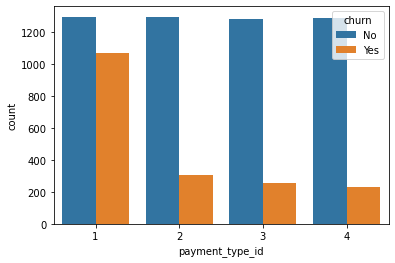

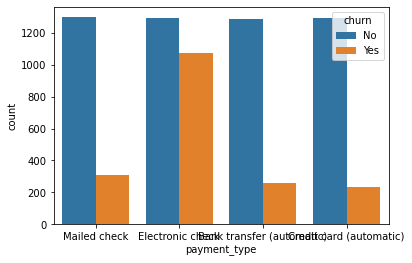

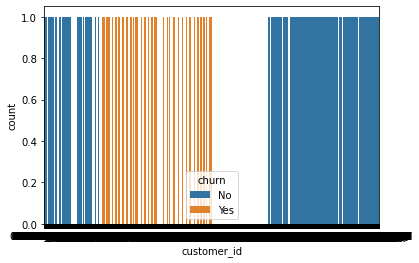

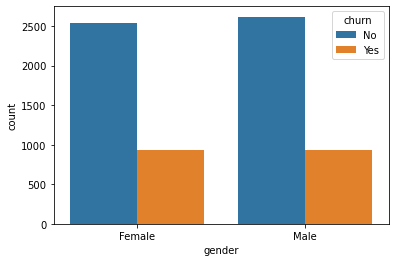

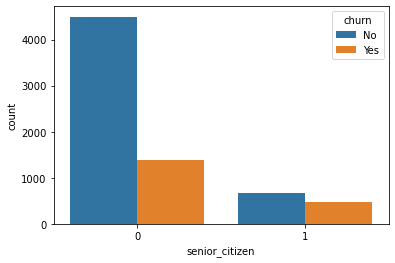

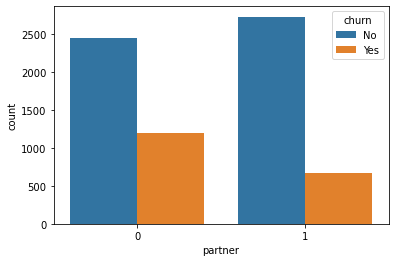

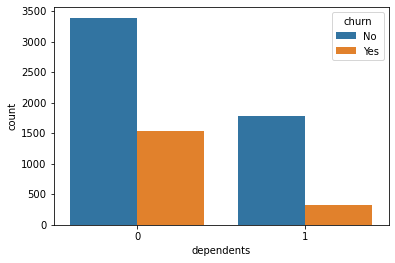

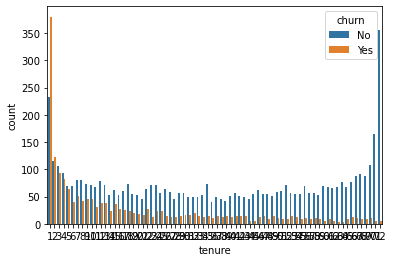

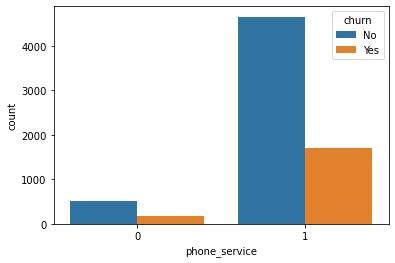

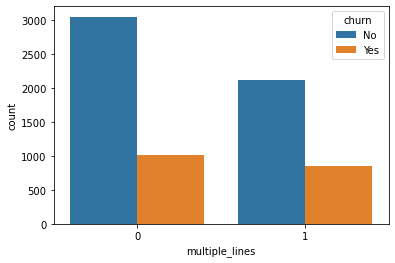

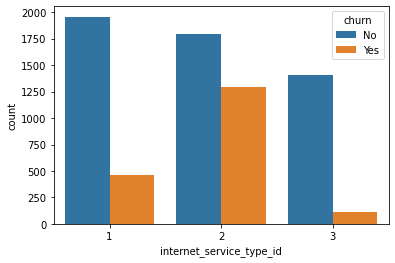

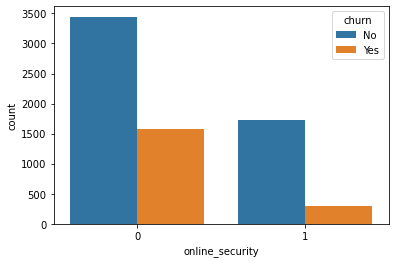

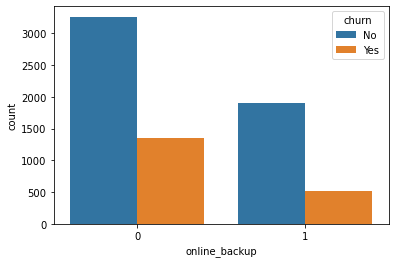

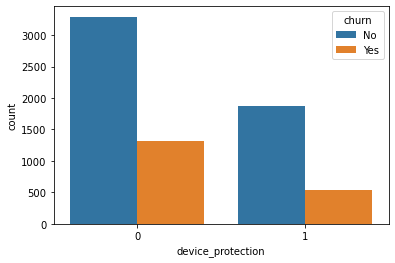

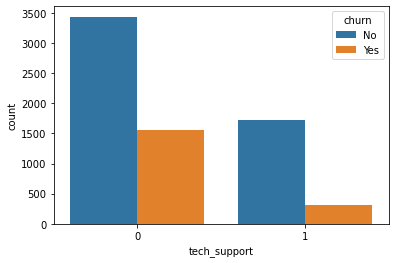

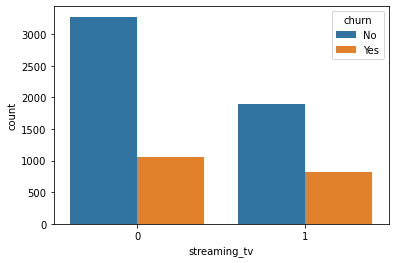

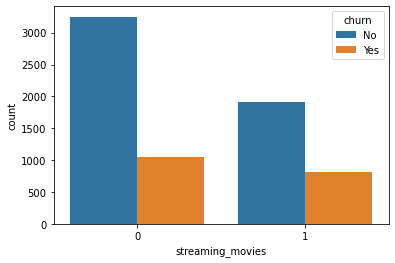

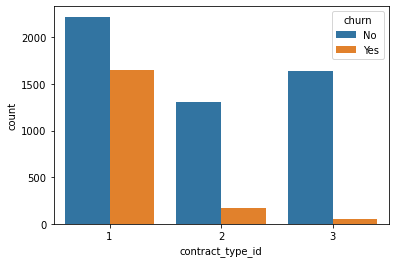

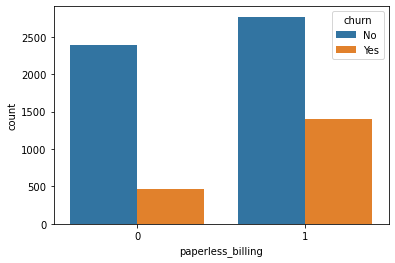

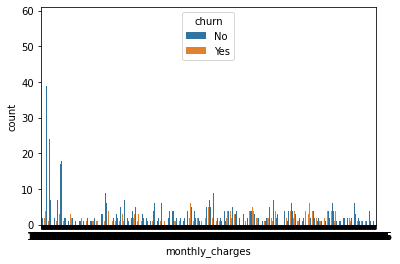

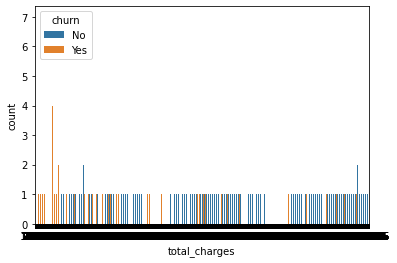

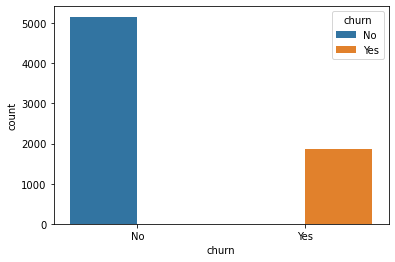

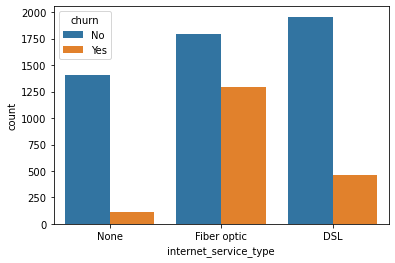

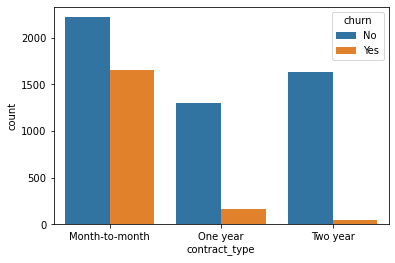

In [30]:
churned_df = df[df['churn']=='Yes']
for i in df.columns:
    sns.countplot(data=df, x=i, hue='churn')
    plt.show()

In [ ]:
# sns.pairplot(data = df, hue='churn')

## Explore

In [ ]:
df.churn.value_counts().sort_index().plot.bar()

In [ ]:
sns.countplot(x='churn', hue='dependents', data=df)

In [ ]:
# partners don't play a part
sns.countplot(x='churn', hue='partner', data=df)

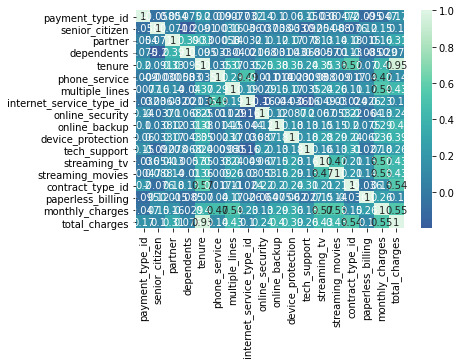

In [32]:
sns.heatmap(churned_df.corr(), cmap='mako', center=0, annot=True)

plt.title('')
plt.show()